In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import keras

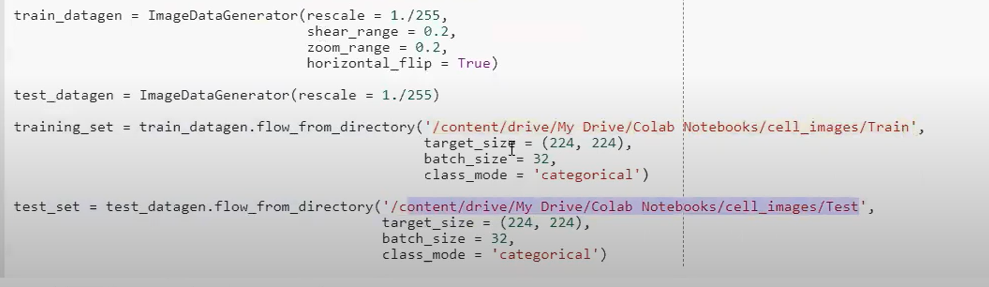

using resnet algorithm ....
reusing the weight ----> called as transfer learning 



In [ ]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50 #taking the resnet 
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/train'
test_path = '/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/test'


In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #creating my own layer

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

#first and last i will be separting it out

In [ ]:

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/train/*')

In [ ]:
folders


['/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/train/orange',
 '/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/train/mixed',
 '/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/train/Apple',
 '/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/train/banana']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# scaling te data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, #keeping it 0-1
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#not doing it for test data just rescale them 

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 240 images belonging to 4 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 41 images belonging to 4 classes.


In [ ]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
8/8 [==============================] - 118s 10s/step - loss: 6.4151 - accuracy: 0.2958 - val_loss: 6.5080 - val_accuracy: 0.2927
Epoch 2/50
8/8 [==============================] - 6s 719ms/step - loss: 4.2250 - accuracy: 0.3042 - val_loss: 2.8596 - val_accuracy: 0.2683
Epoch 3/50
8/8 [==============================] - 6s 704ms/step - loss: 2.2823 - accuracy: 0.4667 - val_loss: 1.8556 - val_accuracy: 0.3902
Epoch 4/50
8/8 [==============================] - 6s 737ms/step - loss: 1.6917 - accuracy: 0.3792 - val_loss: 1.7073 - val_accuracy: 0.4146
Epoch 5/50
8/8 [==============================] - 6s 687ms/step - loss: 1.5009 - accuracy: 0.4708 - val_loss: 1.2940 - val_accuracy: 0.4390
Epoch 6/50
8/8 [==============================] - 6s 709ms/step - loss: 1.1225 - accuracy: 0.5083 - val_loss: 1.0871 - val_accuracy: 0.4634
Epoch 7/50
8/8 [==============================] - 6s 695ms/step - loss: 0.9382 - accuracy: 0.6458 - val_loss: 0.9660 - val_accuracy: 0.6341
Epoch 8/50
8/8 [====

In [ ]:
r.history

{'accuracy': [0.2958333194255829,
  0.30416667461395264,
  0.46666666865348816,
  0.3791666626930237,
  0.47083333134651184,
  0.5083333253860474,
  0.6458333134651184,
  0.699999988079071,
  0.5833333134651184,
  0.5791666507720947,
  0.6583333611488342,
  0.637499988079071,
  0.7041666507720947,
  0.6583333611488342,
  0.6666666865348816,
  0.7333333492279053,
  0.7416666746139526,
  0.6625000238418579,
  0.7041666507720947,
  0.6041666865348816,
  0.6875,
  0.7333333492279053,
  0.7458333373069763,
  0.737500011920929,
  0.7833333611488342,
  0.8125,
  0.7791666388511658,
  0.6916666626930237,
  0.7208333611488342,
  0.6583333611488342,
  0.7541666626930237,
  0.8500000238418579,
  0.6875,
  0.7291666865348816,
  0.6916666626930237,
  0.7458333373069763,
  0.7749999761581421,
  0.7416666746139526,
  0.862500011920929,
  0.7833333611488342,
  0.8208333253860474,
  0.8208333253860474,
  0.8708333373069763,
  0.8041666746139526,
  0.7916666865348816,
  0.8208333253860474,
  0.795833349

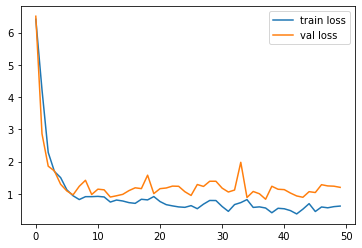

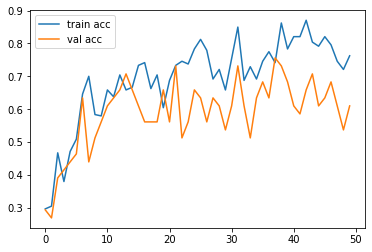

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
y_pred = model.predict(test_set)
y_pred[5]

array([6.1744159e-01, 3.8238209e-01, 5.9675592e-08, 1.7622381e-04],
      dtype=float32)

In [ ]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 1, 1, 0, 3, 0, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 0, 3,
       3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 0, 3, 1, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/TENSORFLOW IMAGE CLASSIFICATION/test/apple/apple_79.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)#testing it 

In [ ]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:

model.predict(img_data)

array([[9.8783322e-02, 4.3623671e-01, 2.7931563e-10, 4.6497998e-01]],
      dtype=float32)

In [ ]:

a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([3])